<a href="https://colab.research.google.com/github/MKrezheska/NLP_Project-Style_Change_Detection/blob/main/Models_doc2vec_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import json
import numpy as np 
import time
import joblib

In [ ]:
df = pd.read_csv('drive/MyDrive/pan-2021/train-all-doc2vec.csv')

In [ ]:
df

,Unnamed: 0,emb,label
0,0,"[-0.42520425, -0.5896193, 0.5205206, -0.593288...",1
1,1,"[-0.4254572, -0.58123827, 0.5221102, -0.587345...",1
2,2,"[-0.42301336, -0.5937055, 0.5184952, -0.595355...",1
3,3,"[-0.40323308, -0.5757907, 0.49620217, -0.57779...",1
4,4,"[-0.44926742, -0.6141171, 0.55056953, -0.61837...",1
...,...,...,...
11195,11195,"[-0.4224246, -0.569643, 0.51600564, -0.5781902...",1
11196,11196,"[-0.4169373, -0.5694096, 0.5110819, -0.5767367...",1
11197,11197,"[-0.43073392, -0.5538504, 0.5250031, -0.567920...",1
11198,11198,"[-0.42834198, -0.54565454, 0.5196462, -0.55598...",1


In [ ]:
df['emb'][0]

'[-0.42520425, -0.5896193, 0.5205206, -0.5932886, 0.1657511, -0.34886378, 0.065321214, 0.12520634, 0.54470944, 1.0779126, -1.0388664, -0.49091935, 0.038679607, -0.33134133, -0.5158262, -0.56863636, 0.42988372, 0.35529396, 0.2653261, 1.0425092, 0.15403545, -0.53597015, -0.013205225, 0.13314776, -0.92486733, 0.49375078, 0.38202682, 0.4338538, 0.50164884, -0.20797144, 0.23583503, -0.5069543, 0.086701185, -0.16796775, 0.07079772, -0.39892146, -0.60181236, 0.25702673, 0.5521362, -0.44194734, 0.45240074, -0.14413077, 0.61322105, 0.13894282, 0.33924207, -0.62094176, 0.0077197435, 0.32877263, 0.17272447, 0.010080969, -0.21490374, 0.41670445, 0.23702203, 0.47660002, 0.03971004, -0.6290445, 0.7459236, 0.35450622, -0.33106786, -0.3165681, -0.14111638, -0.695467, -0.38160384, -0.2600981, -0.1935906, -1.0649455, -0.54054844, -0.13328506, -0.14372575, -0.09179154, 0.059771407, -1.0131506, -0.7321331, -0.43442103, -0.454332, 0.023593185, 0.75746113, -0.8515093, -0.16683702, -1.0565827, 0.028103547, -

In [ ]:
df = df.drop(["Unnamed: 0"], axis="columns")

In [ ]:
df_valid = pd.read_csv('drive/MyDrive/pan-2021/validation-all-doc2vec.csv')
df_valid.head()

,Unnamed: 0,emb,label
0,0,"[-0.37990028, -0.56253105, 0.4701854, -0.55762...",1
1,1,"[-0.42221412, -0.5448298, 0.5109712, -0.555855...",1
2,2,"[-0.43479097, -0.56790036, 0.53096306, -0.5787...",1
3,3,"[-0.4297393, -0.57481635, 0.52691823, -0.58080...",1
4,4,"[-0.4042255, -0.5774633, 0.49579495, -0.579156...",1


In [ ]:
df_valid = df_valid.drop(["Unnamed: 0"], axis="columns")

In [ ]:
df_valid['emb'][0]

'[-0.37990028, -0.56253105, 0.4701854, -0.5576267, 0.14250328, -0.31300092, 0.060595606, 0.1193037, 0.5374184, 1.0698682, -1.0263542, -0.4677257, 0.08764769, -0.35166952, -0.5549489, -0.5978844, 0.452978, 0.38529062, 0.27739707, 1.0950382, 0.17731991, -0.546419, -0.005577241, 0.14550655, -0.9222856, 0.5015864, 0.34565473, 0.4544637, 0.48818466, -0.2110833, 0.27850172, -0.53035027, 0.09297301, -0.15619804, 0.05505348, -0.37496606, -0.60916024, 0.280497, 0.59639704, -0.44303668, 0.47115073, -0.14902681, 0.63431406, 0.14239295, 0.34671393, -0.63242596, 0.0035303102, 0.33642292, 0.18415123, 0.015536377, -0.2141615, 0.41954032, 0.21563134, 0.46663204, 0.013253173, -0.63811815, 0.76331955, 0.3646238, -0.35206798, -0.33780804, -0.14963797, -0.71067137, -0.38623628, -0.2738769, -0.18902993, -1.0382972, -0.52734065, -0.13223806, -0.13042404, -0.09308341, 0.06333991, -1.0068231, -0.7106911, -0.42472067, -0.4404314, 0.02054988, 0.74947464, -0.8382188, -0.16287585, -1.0431864, 0.024675362, -0.0702

In [ ]:
df_train = df.iloc[:, : ]
df_test = df_valid.iloc[:, : ]
print(len(df_train))
print(len(df_test))

11200
2400


In [ ]:
y_train = df_train['label']
df_train.drop(['label'], axis=1, inplace= True)
df_train.head(20)

,emb
0,"[-0.42520425, -0.5896193, 0.5205206, -0.593288..."
1,"[-0.4254572, -0.58123827, 0.5221102, -0.587345..."
2,"[-0.42301336, -0.5937055, 0.5184952, -0.595355..."
3,"[-0.40323308, -0.5757907, 0.49620217, -0.57779..."
4,"[-0.44926742, -0.6141171, 0.55056953, -0.61837..."
5,"[-0.41029772, -0.5299089, 0.4975417, -0.543229..."
6,"[-0.3999887, -0.5586191, 0.4908217, -0.5616216..."
7,"[-0.42021406, -0.5834756, 0.5152512, -0.584816..."
8,"[-0.4283086, -0.601769, 0.525902, -0.60438454,..."
9,"[-0.45847267, -0.5538079, 0.5510276, -0.573133..."


In [ ]:
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace= True)
df_test.head(20)

,emb
0,"[-0.37990028, -0.56253105, 0.4701854, -0.55762..."
1,"[-0.42221412, -0.5448298, 0.5109712, -0.555855..."
2,"[-0.43479097, -0.56790036, 0.53096306, -0.5787..."
3,"[-0.4297393, -0.57481635, 0.52691823, -0.58080..."
4,"[-0.4042255, -0.5774633, 0.49579495, -0.579156..."
5,"[-0.40673274, -0.57594615, 0.49841565, -0.5795..."
6,"[-0.4180541, -0.5691061, 0.51133007, -0.574279..."
7,"[-0.41327032, -0.55593103, 0.505578, -0.561464..."
8,"[-0.40444875, -0.53837246, 0.49089476, -0.5469..."
9,"[-0.4318484, -0.59669435, 0.5286605, -0.598973..."


In [ ]:
df_test['emb'][0]

'[-0.37990028, -0.56253105, 0.4701854, -0.5576267, 0.14250328, -0.31300092, 0.060595606, 0.1193037, 0.5374184, 1.0698682, -1.0263542, -0.4677257, 0.08764769, -0.35166952, -0.5549489, -0.5978844, 0.452978, 0.38529062, 0.27739707, 1.0950382, 0.17731991, -0.546419, -0.005577241, 0.14550655, -0.9222856, 0.5015864, 0.34565473, 0.4544637, 0.48818466, -0.2110833, 0.27850172, -0.53035027, 0.09297301, -0.15619804, 0.05505348, -0.37496606, -0.60916024, 0.280497, 0.59639704, -0.44303668, 0.47115073, -0.14902681, 0.63431406, 0.14239295, 0.34671393, -0.63242596, 0.0035303102, 0.33642292, 0.18415123, 0.015536377, -0.2141615, 0.41954032, 0.21563134, 0.46663204, 0.013253173, -0.63811815, 0.76331955, 0.3646238, -0.35206798, -0.33780804, -0.14963797, -0.71067137, -0.38623628, -0.2738769, -0.18902993, -1.0382972, -0.52734065, -0.13223806, -0.13042404, -0.09308341, 0.06333991, -1.0068231, -0.7106911, -0.42472067, -0.4404314, 0.02054988, 0.74947464, -0.8382188, -0.16287585, -1.0431864, 0.024675362, -0.0702

In [ ]:
xtrain = df_train.values.tolist()
X_test = df_test.values.tolist()

In [ ]:
xtrain = [eval(xtrain[i][0]) for i in range(0, len(xtrain))]
X_test = [eval(X_test[i][0]) for i in range(0, len(X_test))]

In [ ]:
xtrain = np.asarray(xtrain)

In [ ]:
X_test = np.asarray(X_test)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
def print_confusion_matrix(preds, labels, names):
  print(classification_report(labels, preds))

  # Mатрица на конфузија 
  names = names
  confusion = confusion_matrix(labels, preds)
  confusion = 100 * confusion.astype('float') / confusion.sum(axis=-1)[:, np.newaxis]
  df_1 = pd.DataFrame(data=confusion, columns=names, index=names)
  image = sns.heatmap(df_1, annot=True, fmt=".1f", vmin=0, vmax=100,cmap='Greens')
  image.set_title('Confusion matrix')
  image.set_ylabel('True label')
  image.set_xlabel('Predicted label')
  image.plot()

In [ ]:
ytrain = y_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(xtrain, ytrain)
nbc.fit(xtrain, ytrain)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_tree_predict = dtc.predict(X_test)
test_naive_predict = nbc.predict(X_test)
test_random_forest_predict = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.24      0.44      0.31       600
           1       0.74      0.55      0.63      1800

    accuracy                           0.52      2400
   macro avg       0.49      0.49      0.47      2400
weighted avg       0.62      0.52      0.55      2400



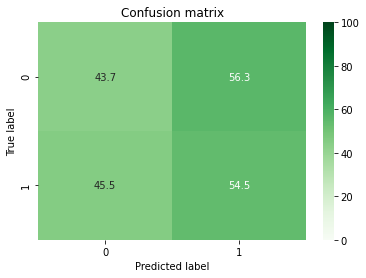

In [ ]:
print_confusion_matrix(test_tree_predict,y_test, ["0", "1"])

              precision    recall  f1-score   support

           0       0.25      0.02      0.04       600
           1       0.75      0.98      0.85      1800

    accuracy                           0.74      2400
   macro avg       0.50      0.50      0.45      2400
weighted avg       0.62      0.74      0.65      2400



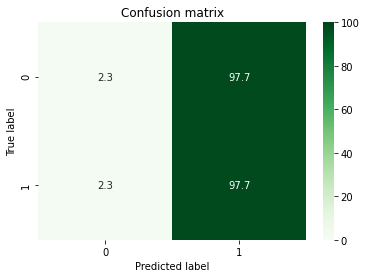

In [ ]:
print_confusion_matrix(test_naive_predict, y_test, ["0", "1"])

              precision    recall  f1-score   support

           0       0.28      0.46      0.35       600
           1       0.77      0.62      0.69      1800

    accuracy                           0.58      2400
   macro avg       0.53      0.54      0.52      2400
weighted avg       0.65      0.58      0.60      2400



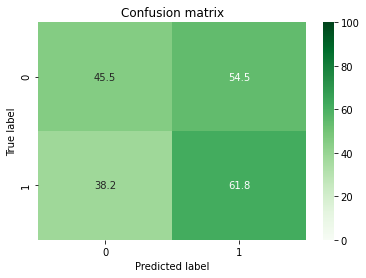

In [ ]:
print_confusion_matrix(test_random_forest_predict,y_test, ["0", "1"])

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score


parameters_rf = {
          "criterion":['gini','entropy'],
          "max_depth": [3,5,None],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 5],
          "min_samples_split": [2, 5],
          'bootstrap': [False, True],
          'max_samples': [0.5, 1],
          'n_estimators': [2, 5, 100],
          "oob_score":[False, True],
           "random_state":[None,2]
         }


gs_rf = RandomizedSearchCV(rfc, parameters_rf, scoring='accuracy', n_jobs=3)
gs_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

Best score: 0.750
Best parameters set:
	 bootstrap: True
	 criterion: 'gini'
	 max_depth: None
	 max_features: 'auto'
	 max_samples: 1
	 min_samples_leaf: 5
	 min_samples_split: 2
	 n_estimators: 5
	 oob_score: False
	 random_state: 2
accuracy:  0.75
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       600
           1       0.75      1.00      0.86      1800

    accuracy                           0.75      2400
   macro avg       0.38      0.50      0.43      2400
weighted avg       0.56      0.75      0.64      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


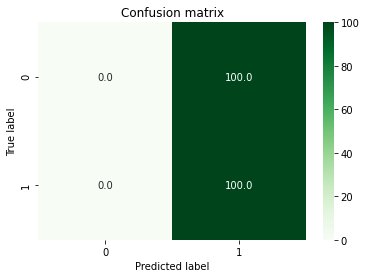

In [ ]:
print("Best score: %0.3f" % gs_rf.best_score_) 
print("Best parameters set:" )
best_parameters_rf = gs_rf.best_estimator_.get_params()
for param_name_rf in sorted (parameters_rf . keys()): 
                    print("\t %s: %r" % (param_name_rf, best_parameters_rf[param_name_rf]))
        
y_pred = gs_rf.predict(X_test)

# print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print_confusion_matrix( y_pred,y_test, ["0", "1"])

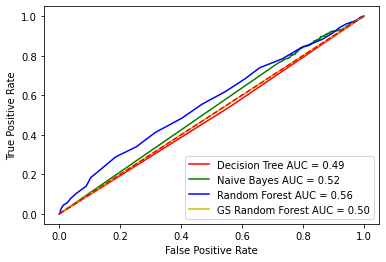

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
decision_tree_prob = [p[1] for p in dtc.predict_proba(X_test)]
naive_bayes_prob = [p[1] for p in nbc.predict_proba(X_test)]
random_forest_prob = [p[1] for p in rfc.predict_proba(X_test)]
random_forest_prob_1 = [p[1] for p in gs_rf.predict_proba(X_test)]


dt_false_pos, dt_true_pos, _ = roc_curve(actual, decision_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

nb_false_pos, nb_true_pos, _ = roc_curve(actual, naive_bayes_prob)
nb_auc = auc(nb_false_pos, nb_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, random_forest_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)

gs_rf_false_pos, gs_rf_true_pos, _ = roc_curve(actual, random_forest_prob_1)
gs_rf_auc = auc(gs_rf_false_pos, gs_rf_true_pos)

# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='Decision Tree AUC = %0.2f'% dt_auc)
plt.plot(nb_false_pos, nb_true_pos, 'g', label='Naive Bayes AUC = %0.2f'% nb_auc)
plt.plot(rf_false_pos, rf_true_pos, 'b', label='Random Forest AUC = %0.2f'% rf_auc)
plt.plot(gs_rf_false_pos, gs_rf_true_pos, 'y', label='GS Random Forest AUC = %0.2f'% gs_rf_auc)


plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
X_train_norm = xtrain
X_test_norm = X_test

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 29 kB/s 


In [ ]:
from catboost import Pool, cv, CatBoostClassifier, CatBoostRegressor

In [ ]:
train_pool = Pool(data=xtrain,label = ytrain)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
model_basic = CatBoostClassifier()
model_basic.fit(train_pool, plot=True,silent=True)
print(model_basic.get_best_score())

predicted_values = model_basic.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.21628284270175893}}


              precision    recall  f1-score   support

           0       0.35      0.41      0.38       600
           1       0.79      0.75      0.77      1800

    accuracy                           0.66      2400
   macro avg       0.57      0.58      0.57      2400
weighted avg       0.68      0.66      0.67      2400

Accuracy: 0.6629166666666667


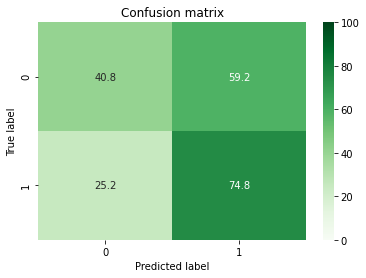

In [ ]:
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

Learning rate:  0.5
              precision    recall  f1-score   support

           0       0.27      0.61      0.38       600
           1       0.78      0.45      0.57      1800

    accuracy                           0.49      2400
   macro avg       0.52      0.53      0.47      2400
weighted avg       0.65      0.49      0.52      2400



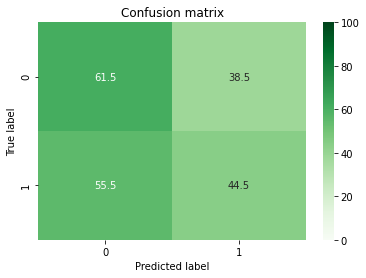

Learning rate:  0.75
              precision    recall  f1-score   support

           0       0.28      0.61      0.38       600
           1       0.78      0.46      0.58      1800

    accuracy                           0.50      2400
   macro avg       0.53      0.54      0.48      2400
weighted avg       0.66      0.50      0.53      2400



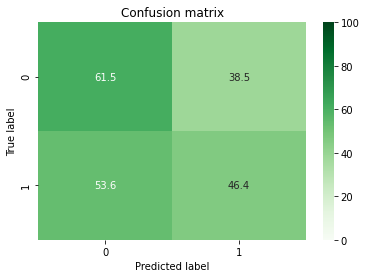

Learning rate:  1
              precision    recall  f1-score   support

           0       0.29      0.63      0.39       600
           1       0.79      0.47      0.59      1800

    accuracy                           0.51      2400
   macro avg       0.54      0.55      0.49      2400
weighted avg       0.67      0.51      0.54      2400



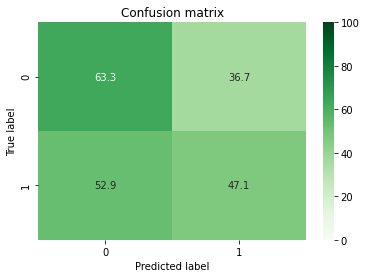

Learning rate:  1.1
              precision    recall  f1-score   support

           0       0.26      0.69      0.38       600
           1       0.78      0.36      0.49      1800

    accuracy                           0.44      2400
   macro avg       0.52      0.53      0.44      2400
weighted avg       0.65      0.44      0.47      2400



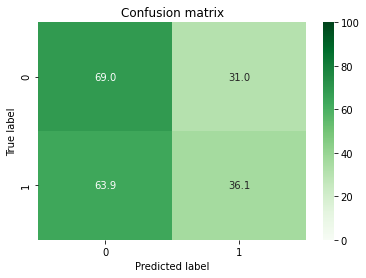

Learning rate:  1.2
              precision    recall  f1-score   support

           0       0.28      0.68      0.39       600
           1       0.79      0.41      0.54      1800

    accuracy                           0.48      2400
   macro avg       0.53      0.54      0.47      2400
weighted avg       0.66      0.48      0.50      2400



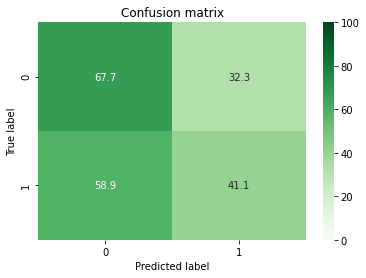

Learning rate:  1.3
              precision    recall  f1-score   support

           0       0.26      0.60      0.37       600
           1       0.77      0.44      0.56      1800

    accuracy                           0.48      2400
   macro avg       0.52      0.52      0.46      2400
weighted avg       0.64      0.48      0.51      2400



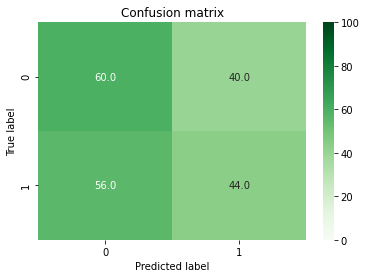

Learning rate:  1.4
              precision    recall  f1-score   support

           0       0.27      0.60      0.37       600
           1       0.78      0.47      0.58      1800

    accuracy                           0.50      2400
   macro avg       0.53      0.53      0.48      2400
weighted avg       0.65      0.50      0.53      2400



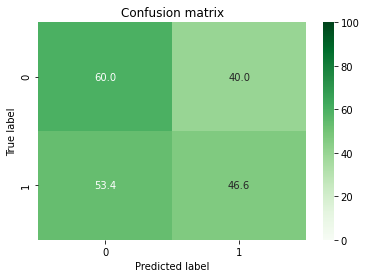

Learning rate:  1.5
              precision    recall  f1-score   support

           0       0.27      0.56      0.36       600
           1       0.77      0.50      0.60      1800

    accuracy                           0.51      2400
   macro avg       0.52      0.53      0.48      2400
weighted avg       0.65      0.51      0.54      2400



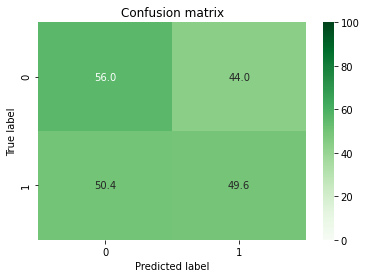

Learning rate:  2
              precision    recall  f1-score   support

           0       0.27      0.56      0.36       600
           1       0.77      0.50      0.61      1800

    accuracy                           0.51      2400
   macro avg       0.52      0.53      0.49      2400
weighted avg       0.65      0.51      0.55      2400



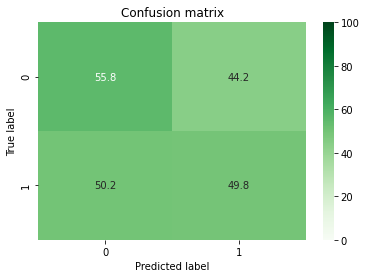

Learning rate:  3
              precision    recall  f1-score   support

           0       0.25      0.46      0.32       600
           1       0.75      0.54      0.63      1800

    accuracy                           0.52      2400
   macro avg       0.50      0.50      0.48      2400
weighted avg       0.63      0.52      0.55      2400



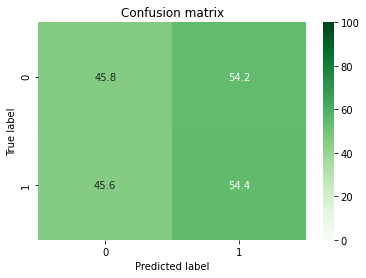

Learning rate:  4
              precision    recall  f1-score   support

           0       0.28      0.47      0.35       600
           1       0.77      0.59      0.67      1800

    accuracy                           0.56      2400
   macro avg       0.52      0.53      0.51      2400
weighted avg       0.65      0.56      0.59      2400



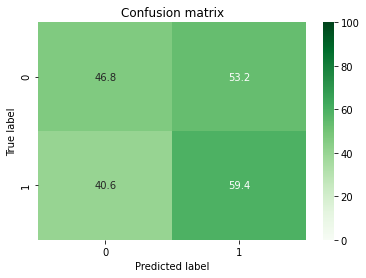

Learning rate:  5
              precision    recall  f1-score   support

           0       0.27      0.47      0.34       600
           1       0.76      0.57      0.66      1800

    accuracy                           0.55      2400
   macro avg       0.52      0.52      0.50      2400
weighted avg       0.64      0.55      0.58      2400



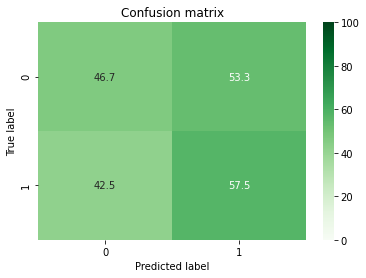

Learning rate:  6.3
              precision    recall  f1-score   support

           0       0.23      0.29      0.26       600
           1       0.74      0.68      0.71      1800

    accuracy                           0.58      2400
   macro avg       0.49      0.48      0.48      2400
weighted avg       0.61      0.58      0.60      2400



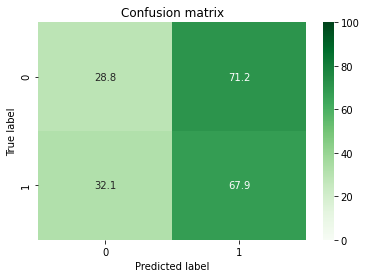

Learning rate:  7.7
              precision    recall  f1-score   support

           0       0.26      0.40      0.31       600
           1       0.75      0.61      0.67      1800

    accuracy                           0.56      2400
   macro avg       0.51      0.51      0.49      2400
weighted avg       0.63      0.56      0.58      2400



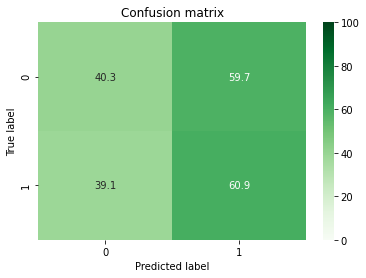

Learning rate:  10
              precision    recall  f1-score   support

           0       0.26      0.46      0.33       600
           1       0.75      0.56      0.64      1800

    accuracy                           0.53      2400
   macro avg       0.51      0.51      0.48      2400
weighted avg       0.63      0.53      0.56      2400



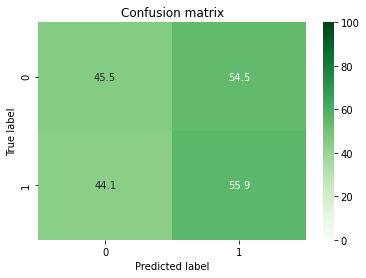

Learning rate:  20
              precision    recall  f1-score   support

           0       0.24      0.43      0.31       600
           1       0.74      0.56      0.64      1800

    accuracy                           0.52      2400
   macro avg       0.49      0.49      0.47      2400
weighted avg       0.62      0.52      0.55      2400



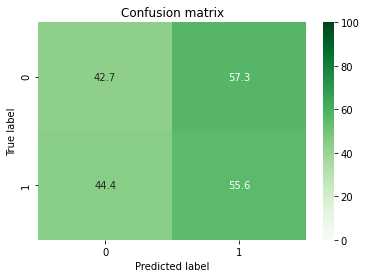

Learning rate:  30
              precision    recall  f1-score   support

           0       0.27      0.41      0.32       600
           1       0.76      0.63      0.69      1800

    accuracy                           0.57      2400
   macro avg       0.52      0.52      0.51      2400
weighted avg       0.64      0.57      0.60      2400



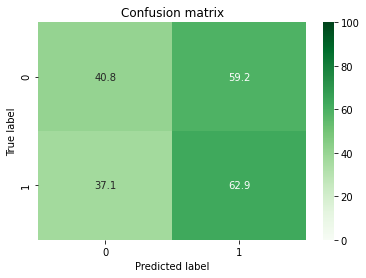

Learning rate:  45
              precision    recall  f1-score   support

           0       0.26      0.49      0.33       600
           1       0.75      0.53      0.62      1800

    accuracy                           0.52      2400
   macro avg       0.51      0.51      0.48      2400
weighted avg       0.63      0.52      0.55      2400



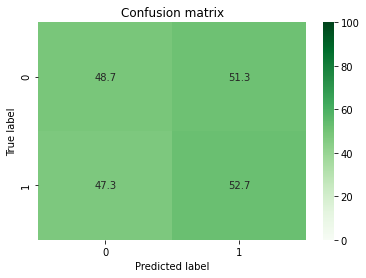

Learning rate:  55
              precision    recall  f1-score   support

           0       0.28      0.40      0.33       600
           1       0.77      0.66      0.71      1800

    accuracy                           0.59      2400
   macro avg       0.52      0.53      0.52      2400
weighted avg       0.65      0.59      0.61      2400



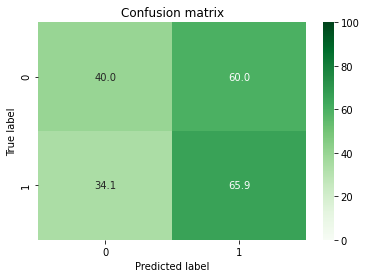

Learning rate:  62
              precision    recall  f1-score   support

           0       0.26      0.49      0.34       600
           1       0.76      0.54      0.63      1800

    accuracy                           0.53      2400
   macro avg       0.51      0.52      0.49      2400
weighted avg       0.64      0.53      0.56      2400



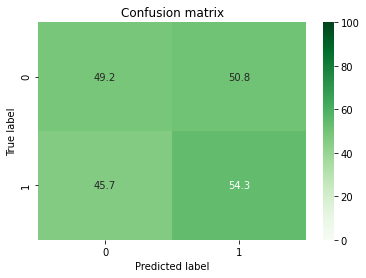

Learning rate:  77
              precision    recall  f1-score   support

           0       0.25      0.44      0.32       600
           1       0.75      0.56      0.64      1800

    accuracy                           0.53      2400
   macro avg       0.50      0.50      0.48      2400
weighted avg       0.62      0.53      0.56      2400



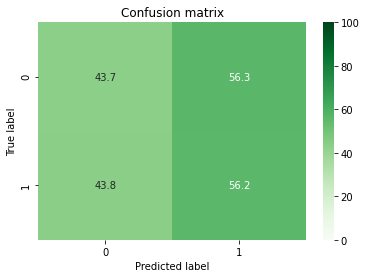

Learning rate:  84
              precision    recall  f1-score   support

           0       0.26      0.48      0.34       600
           1       0.76      0.54      0.63      1800

    accuracy                           0.53      2400
   macro avg       0.51      0.51      0.48      2400
weighted avg       0.63      0.53      0.56      2400



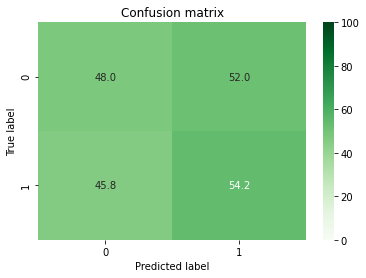

Learning rate:  90
              precision    recall  f1-score   support

           0       0.26      0.52      0.35       600
           1       0.76      0.50      0.61      1800

    accuracy                           0.51      2400
   macro avg       0.51      0.51      0.48      2400
weighted avg       0.63      0.51      0.54      2400



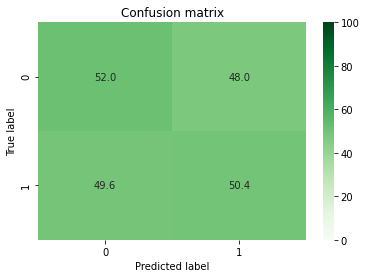

In [ ]:
lr_list = [ 0.5, 0.75, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5, 6.3, 7.7, 10, 20, 30, 45, 55, 62, 77, 84, 90]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=10, max_depth=10, random_state=0)
    gb_clf.fit(xtrain, ytrain)
    predicted_values = gb_clf.predict(X_test)

    print("Learning rate: ", learning_rate)
    print_confusion_matrix(predicted_values, y_test, ["0", "1"])
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import scipy.stats as st

In [ ]:
X_val, X_test_1, y_val, y_test_1 = train_test_split(X_test, y_test, test_size=0.7, random_state=42)

In [ ]:
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, roc_auc_score)

gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=xtrain, y=ytrain)
fit_params_of_xgb = {
    "early_stopping_rounds":100, 
    "eval_metric" : 'auc', 
    "eval_set" : [(X_val,y_val)],
    'verbose': 500,
}
params = {
    'booster': ["gbtree"],
    'learning_rate': [0.01],
    'n_estimators': [3000],
    'min_child_weight': [1],#1
    'gamma': [0],
    'subsample': [0.4],
    'colsample_bytree': [0.8],
    'max_depth': [4],
    "scale_pos_weight": [1],
    "reg_alpha":[1],#0.08
}
xgb_estimator = XGBClassifier(
    objective='binary:logistic',
    silent=True,
)

gsearch = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=params,
    scoring='roc_auc',
    n_jobs=-1,
    cv=gkf, verbose=3
)
xgb_model = gsearch.fit(X=xtrain, y=ytrain, **fit_params_of_xgb)
gsearch.best_params_, gsearch.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.0min finished


[0]	validation_0-auc:0.532572
Will train until validation_0-auc hasn't improved in 100 rounds.
Stopping. Best iteration:
[263]	validation_0-auc:0.664253



({'booster': 'gbtree',
  'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.01,
  'max_depth': 4,
  'min_child_weight': 1,
  'n_estimators': 3000,
  'reg_alpha': 1,
  'scale_pos_weight': 1,
  'subsample': 0.4},
 0.7486572365037323)

In [ ]:
predicted_values = xgb_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.41      0.16      0.23       600
           1       0.77      0.92      0.84      1800

    accuracy                           0.73      2400
   macro avg       0.59      0.54      0.53      2400
weighted avg       0.68      0.73      0.69      2400

Accuracy: 0.7325


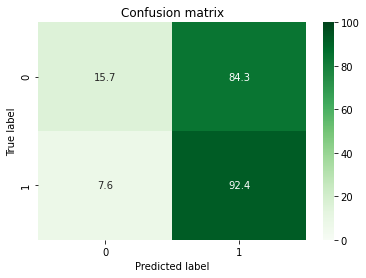

In [ ]:
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

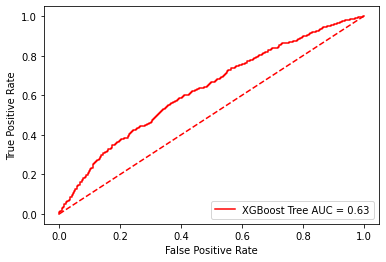

In [ ]:
actual = y_test
xg_tree_prob = [p[1] for p in xgb_model.predict_proba(X_test)]


dt_false_pos, dt_true_pos, _ = roc_curve(actual, xg_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='XGBoost Tree AUC = %0.2f'% dt_auc)


plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier((20, ), max_iter=100000).fit(xtrain, ytrain)

In [ ]:
predicted_values = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.35      0.35      0.35       600
           1       0.78      0.78      0.78      1800

    accuracy                           0.67      2400
   macro avg       0.57      0.57      0.57      2400
weighted avg       0.68      0.67      0.67      2400

Accuracy: 0.67375


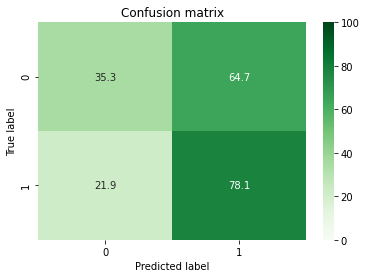

In [ ]:
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.35      0.36      0.35       600
           1       0.78      0.78      0.78      1800

    accuracy                           0.68      2400
   macro avg       0.57      0.57      0.57      2400
weighted avg       0.68      0.68      0.68      2400

Accuracy: 0.675


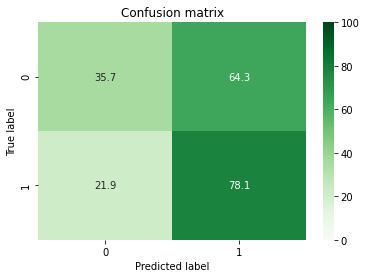

In [ ]:
clf = MLPClassifier((20, 20, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.37      0.36      0.37       600
           1       0.79      0.79      0.79      1800

    accuracy                           0.68      2400
   macro avg       0.58      0.58      0.58      2400
weighted avg       0.68      0.68      0.68      2400

Accuracy: 0.6833333333333333


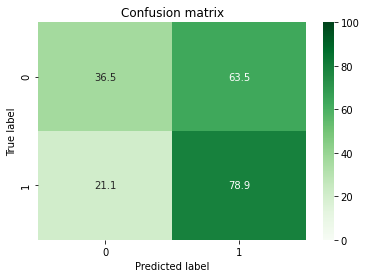

In [ ]:
clf = MLPClassifier((1000, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.34      0.31      0.33       600
           1       0.78      0.80      0.79      1800

    accuracy                           0.68      2400
   macro avg       0.56      0.56      0.56      2400
weighted avg       0.67      0.68      0.67      2400

Accuracy: 0.67625


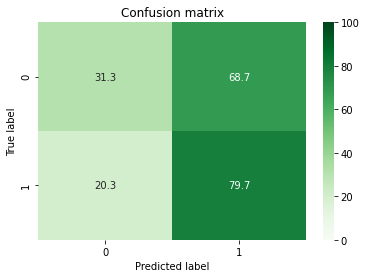

In [ ]:
clf = MLPClassifier((256, 64, 128, ), max_iter=100000, learning_rate="invscaling").fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

Undersampling со RandomUndersampler

In [ ]:
from collections import Counter
# from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

undersample = RandomUnderSampler(sampling_strategy=0.5)
X_train = xtrain
X_over, y_over = undersample.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({1: 5600, 0: 2800})


In [ ]:
final, targets = shuffle(X_over,y_over,random_state=0)
X_train_u  = final
y_train_u  = targets
X_test = df_test.values.tolist()
print('Training set class distribution %s' % Counter(y_train_u))
print('Testing set class distribution %s' % Counter(y_test))

Training set class distribution Counter({1: 5600, 0: 2800})
Testing set class distribution Counter({1: 1800, 0: 600})


([<matplotlib.patches.Wedge at 0x7f9bebd5e190>,
 [Text(-0.5500000594609755, 0.9526279098330699, '1.0'),
  Text(0.5500001486524352, -0.9526278583383436, '0.0')],
 [Text(-0.30000003243325934, 0.5196152235453108, '67%'),
  Text(0.30000008108314646, -0.5196151954572783, '33%')])

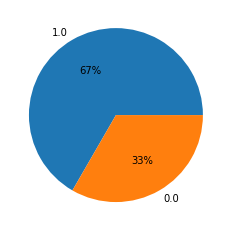

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.pie([float(v) for v in Counter(y_train_u).values()], labels=[float(k) for k in Counter(y_train_u).keys()],
           autopct='%1.0f%%')

Oversampling со SMOTE

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import where
# X = df_train.values.tolist()
counter = Counter(ytrain)
print('Original dataset shape %s' % Counter(ytrain))
oversample = SMOTE(sampling_strategy=0.7)
X_train_o, y_train_o = oversample.fit_resample(xtrain, ytrain)
print('Resampled dataset shape %s' % Counter(y_train_o))

Original dataset shape Counter({1: 8400, 0: 2800})
Resampled dataset shape Counter({1: 8400, 0: 5880})


([<matplotlib.patches.Wedge at 0x7f9bf7da5cd0>,
 [Text(-0.30102937065636565, 1.0580081842794187, '1.0'),
  Text(0.30102946971423916, -1.0580081560950105, '0.0')],
 [Text(-0.16419783853983577, 0.5770953732433193, '59%'),
  Text(0.16419789257140316, -0.5770953578700057, '41%')])

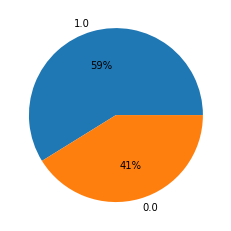

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.pie([float(v) for v in Counter(y_train_o).values()], labels=[float(k) for k in Counter(y_train_o).keys()],
           autopct='%1.0f%%')

Комбинација: Undersampling на majority, Oversampling на minority

In [ ]:
from imblearn.pipeline import Pipeline
print('Original dataset shape %s' % Counter(ytrain))
over = SMOTE(sampling_strategy=0.7)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('u', under),('o', over)]
pipeline = Pipeline(steps=steps)
X_train_ou, y_train_ou = pipeline.fit_resample(xtrain, ytrain)
counter = Counter(y_train_ou)
print('Resampled dataset shape %s' % Counter(counter))

Original dataset shape Counter({1: 8400, 0: 2800})
Resampled dataset shape Counter({1: 5600, 0: 3919})


([<matplotlib.patches.Wedge at 0x7f9bf5ad62d0>,
 [Text(0.30123471196054497, 1.0579497380830754, '0.0'),
  Text(-0.3012348110129466, -1.0579497098794415, '1.0')],
 [Text(0.16430984288756995, 0.5770634934998592, '41%'),
  Text(-0.16430989691615266, -0.577063478116059, '59%')])

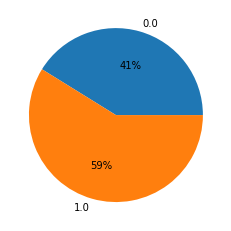

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.pie([float(v) for v in Counter(y_train_ou).values()], labels=[float(k) for k in Counter(y_train_ou).keys()],
           autopct='%1.0f%%')

In [ ]:
X_test = [eval(X_test[i][0]) for i in range(0, len(X_test))]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(X_train_u, y_train_u)
nbc.fit(X_train_u, y_train_u)
rfc.fit(X_train_u, y_train_u)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_tree_predict = dtc.predict(X_test)
test_naive_predict = nbc.predict(X_test)
test_random_forest_predict = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.26      0.50      0.34       600
           1       0.75      0.52      0.61      1800

    accuracy                           0.51      2400
   macro avg       0.51      0.51      0.48      2400
weighted avg       0.63      0.51      0.54      2400



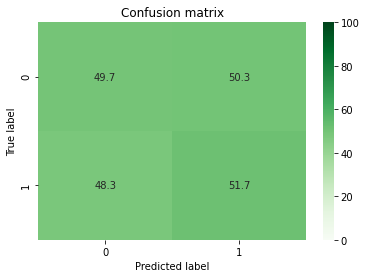

In [ ]:
print_confusion_matrix(test_tree_predict,y_test, ["0", "1"])

              precision    recall  f1-score   support

           0       0.27      0.03      0.05       600
           1       0.75      0.97      0.85      1800

    accuracy                           0.74      2400
   macro avg       0.51      0.50      0.45      2400
weighted avg       0.63      0.74      0.65      2400



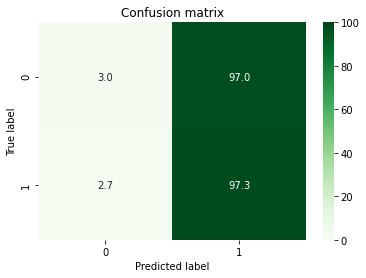

In [ ]:
print_confusion_matrix(test_naive_predict, y_test, ["0", "1"])

              precision    recall  f1-score   support

           0       0.28      0.49      0.36       600
           1       0.77      0.59      0.67      1800

    accuracy                           0.56      2400
   macro avg       0.53      0.54      0.51      2400
weighted avg       0.65      0.56      0.59      2400



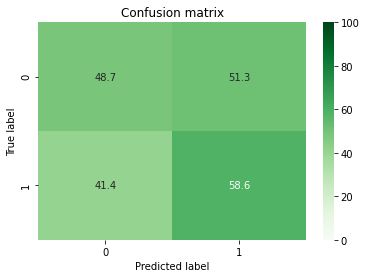

In [ ]:
print_confusion_matrix(test_random_forest_predict,y_test, ["0", "1"])

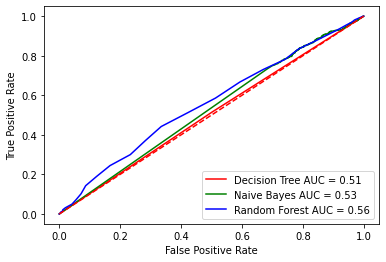

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
decision_tree_prob = [p[1] for p in dtc.predict_proba(X_test)]
naive_bayes_prob = [p[1] for p in nbc.predict_proba(X_test)]
random_forest_prob = [p[1] for p in rfc.predict_proba(X_test)]


dt_false_pos, dt_true_pos, _ = roc_curve(actual, decision_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

nb_false_pos, nb_true_pos, _ = roc_curve(actual, naive_bayes_prob)
nb_auc = auc(nb_false_pos, nb_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, random_forest_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)


# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='Decision Tree AUC = %0.2f'% dt_auc)
plt.plot(nb_false_pos, nb_true_pos, 'g', label='Naive Bayes AUC = %0.2f'% nb_auc)
plt.plot(rf_false_pos, rf_true_pos, 'b', label='Random Forest AUC = %0.2f'% rf_auc)


plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import keras
from keras.models import Sequential 
from keras.layers import Dense   
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_ou, y_train_ou, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.fit_transform(X_val)
X_test_norm = scaler.fit_transform(X_test)

In [ ]:
classifier = Sequential()

classifier.add(Dense(64, activation='relu', input_dim=600))

classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(1, activation='sigmoid'))


classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=30)
history_callback = classifier.fit(X_train_norm, y_train, epochs=500, batch_size=64,validation_data=(X_val_norm,y_val), callbacks=[es])

Epoch 1/500
119/119 [==============================] - 2s 5ms/step - loss: 0.5552 - accuracy: 0.7031 - val_loss: 0.4538 - val_accuracy: 0.7889
Epoch 2/500
119/119 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.8615 - val_loss: 0.4028 - val_accuracy: 0.8057
Epoch 3/500
119/119 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.9049 - val_loss: 0.4026 - val_accuracy: 0.8309
Epoch 4/500
119/119 [==============================] - 0s 3ms/step - loss: 0.1610 - accuracy: 0.9392 - val_loss: 0.4385 - val_accuracy: 0.8309
Epoch 5/500
119/119 [==============================] - 0s 3ms/step - loss: 0.1105 - accuracy: 0.9626 - val_loss: 0.5025 - val_accuracy: 0.8335
Epoch 6/500
119/119 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 0.9691 - val_loss: 0.5847 - val_accuracy: 0.8377
Epoch 7/500
119/119 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9794 - val_loss: 0.5932 - val_accuracy: 0.8351

In [ ]:
probs       = classifier.predict(X_test_norm)
preds       = probs > 0.5
print('Neural network score on test:\n',classification_report(y_test, preds))

Neural network score on test:
               precision    recall  f1-score   support

           0       0.34      0.46      0.39       600
           1       0.79      0.70      0.74      1800

    accuracy                           0.64      2400
   macro avg       0.57      0.58      0.57      2400
weighted avg       0.68      0.64      0.65      2400



[]

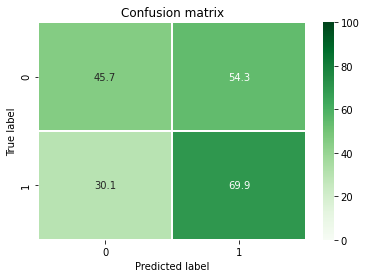

In [ ]:
cm=confusion_matrix(y_test,preds)
names = ['0', '1'] 
cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  
 

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sns.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Greens')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

In [ ]:
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, roc_auc_score)

gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train_u, y=y_train_u)
fit_params_of_xgb = {
    "early_stopping_rounds":100, 
    "eval_metric" : 'auc', 
    "eval_set" : [(X_val,y_val)],
    'verbose': 500,
}
params = {
    'booster': ["gbtree"],
    'learning_rate': [0.01],
    'n_estimators': [3000],
    'min_child_weight': [1],#1
    'gamma': [0],
    'subsample': [0.4],
    'colsample_bytree': [0.8],
    'max_depth': [4],
    "scale_pos_weight": [1],
    "reg_alpha":[1],#0.08
}
xgb_estimator = XGBClassifier(
    objective='binary:logistic',
    silent=True,
)

gsearch = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=params,
    scoring='roc_auc',
    n_jobs=-1,
    cv=gkf, verbose=3
)
xgb_model = gsearch.fit(X=X_train_u, y=y_train_u, **fit_params_of_xgb)
gsearch.best_params_, gsearch.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 21.1min finished


[0]	validation_0-auc:0.64644
Will train until validation_0-auc hasn't improved in 100 rounds.
[500]	validation_0-auc:0.927835
[1000]	validation_0-auc:0.972363
[1500]	validation_0-auc:0.986826
[2000]	validation_0-auc:0.992032
[2500]	validation_0-auc:0.994475
[2999]	validation_0-auc:0.995863


({'booster': 'gbtree',
  'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.01,
  'max_depth': 4,
  'min_child_weight': 1,
  'n_estimators': 3000,
  'reg_alpha': 1,
  'scale_pos_weight': 1,
  'subsample': 0.4},
 0.8452315380547771)

In [ ]:
predicted_values = xgb_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.33      0.67      0.44       600
           1       0.83      0.55      0.66      1800

    accuracy                           0.58      2400
   macro avg       0.58      0.61      0.55      2400
weighted avg       0.71      0.58      0.61      2400

Accuracy: 0.5804166666666667


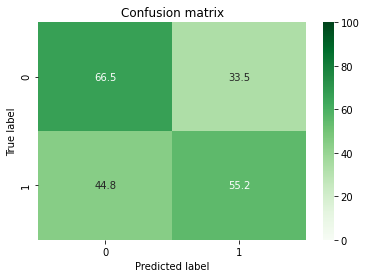

In [ ]:
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

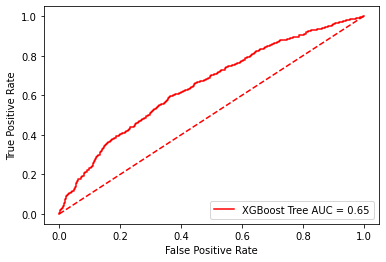

In [ ]:
actual = y_test
xg_tree_prob = [p[1] for p in xgb_model.predict_proba(X_test)]


dt_false_pos, dt_true_pos, _ = roc_curve(actual, xg_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='XGBoost Tree AUC = %0.2f'% dt_auc)


plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

           0       0.32      0.61      0.42       600
           1       0.81      0.57      0.67      1800

    accuracy                           0.58      2400
   macro avg       0.57      0.59      0.54      2400
weighted avg       0.69      0.58      0.61      2400

Accuracy: 0.5779166666666666


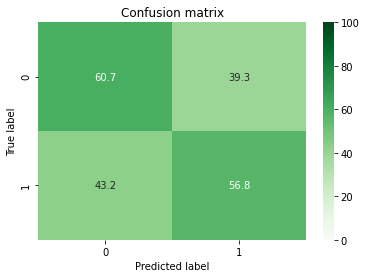

In [ ]:
clf = MLPClassifier((20, 20, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.34      0.34      0.34       600
           1       0.78      0.78      0.78      1800

    accuracy                           0.67      2400
   macro avg       0.56      0.56      0.56      2400
weighted avg       0.67      0.67      0.67      2400

Accuracy: 0.6683333333333333


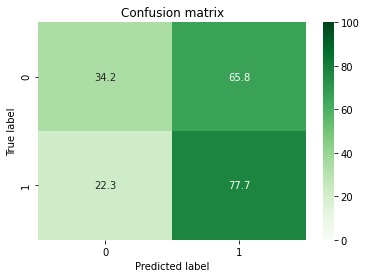

In [ ]:
clf = MLPClassifier((256, 64, 128, ), max_iter=100000, learning_rate="invscaling").fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))